Load all the necessary libraries

In [6]:
# Import required libraries
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam

In [ ]:
# PARAMETERS
dataset_path = '/Users/nvssrj/Desktop/ECE_5831_Proj/mrleyedataset'  
img_size = (64, 64)  
batch_size = 32
epochs = 15  
learning_rate = 0.001

In this cell we will do data preprocessing 

In [9]:
# DATA PREPROCESSING

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


Implement the Custom CNN model 

In [11]:
# CNN MODEL FROM SCRATCH

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

print("Training CNN from scratch...")
cnn_model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Training CNN from scratch...
Epoch 1/15


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2123/2123 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.8964 - loss: 0.2544 - val_accuracy: 0.9111 - val_loss: 0.2467
Epoch 2/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.8964 - loss: 0.2544 - val_accuracy: 0.9111 - val_loss: 0.2467
Epoch 2/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 56s 26ms/step - accuracy: 0.9738 - loss: 0.0783 - val_accuracy: 0.9045 - val_loss: 0.2457
Epoch 3/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 56s 26ms/step - accuracy: 0.9738 - loss: 0.0783 - val_accuracy: 0.9045 - val_loss: 0.2457
Epoch 3/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.9782 - loss: 0.0622 - val_accuracy: 0.8973 - val_loss: 0.2969
Epoch 4/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.9782 - loss: 0.0622 - val_accuracy: 0.8973 - val_loss: 0.2969
Epoch 4/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.9833 - loss: 0.0504 - val_accuracy: 0.8968 - val_loss: 0.2710
Epoch 5/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.9833 - loss: 0.05

We will test the above custom CNN model 


CNN MODEL EVALUATION

Validation Accuracy: 0.9104
Validation Loss: 0.3738

Sample Predictions (showing 5 images):
------------------------------------------------------------
✓ Sample 1: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✗ Sample 2: True=Open-Eyes    | Pred=Close-Eyes   | Confidence=0.676
✓ Sample 3: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✓ Sample 4: True=Open-Eyes    | Pred=Open-Eyes    | Confidence=0.999
✓ Sample 5: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000

Validation Accuracy: 0.9104
Validation Loss: 0.3738

Sample Predictions (showing 5 images):
------------------------------------------------------------
✓ Sample 1: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✗ Sample 2: True=Open-Eyes    | Pred=Close-Eyes   | Confidence=0.676
✓ Sample 3: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✓ Sample 4: True=Open-Eyes    | Pred=Open-Eyes    | Confidence=0.999
✓ Sample 5: True=Close-Eyes   | Pred=Close-Eyes  

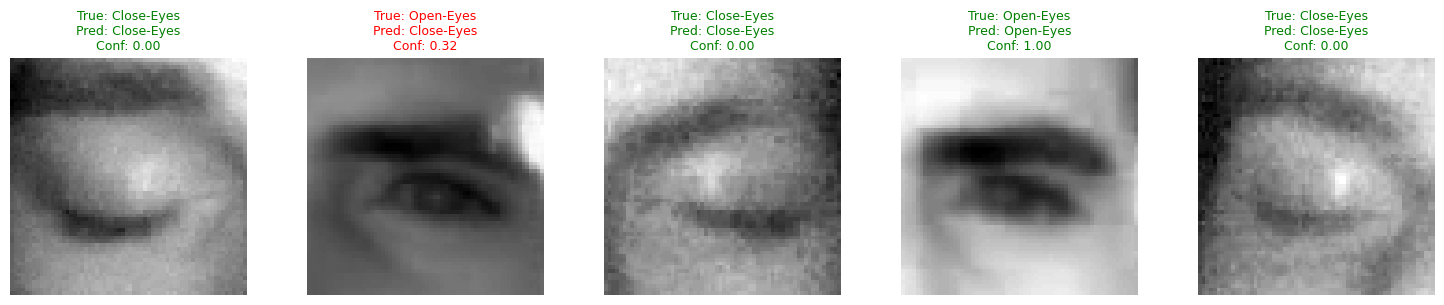


Confusion Matrix:
----------------------------------------
                 Predicted
              Close  |  Open
Actual Close:   7726  |    663
Actual Open:     870  |   7720

Detailed Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

  Close-Eyes       0.90      0.92      0.91      8389
   Open-Eyes       0.92      0.90      0.91      8590

    accuracy                           0.91     16979
   macro avg       0.91      0.91      0.91     16979
weighted avg       0.91      0.91      0.91     16979


Model testing complete!


In [ ]:

print("\n" + "="*50)
print("CNN MODEL EVALUATION")
print("="*50)

# Evaluate on validation set
test_loss, test_acc = cnn_model.evaluate(val_generator, verbose=0)
print(f"\nValidation Accuracy: {test_acc:.4f}")
print(f"Validation Loss: {test_loss:.4f}")

# Get predictions on a batch
val_generator.reset()
sample_batch = next(val_generator)
sample_imgs = sample_batch[0]
sample_labels = sample_batch[1]

# Predict
pred_probs = cnn_model.predict(sample_imgs, verbose=0)
pred_classes = (pred_probs > 0.5).astype(int).flatten()
true_classes = sample_labels.astype(int)

# Display sample predictions
classes = ["Close-Eyes", "Open-Eyes"]
num_display = min(5, len(sample_imgs))

print(f"\nSample Predictions (showing {num_display} images):")
print("-" * 60)
for i in range(num_display):
    true_label = classes[true_classes[i]]
    pred_label = classes[pred_classes[i]]
    confidence = pred_probs[i][0] if pred_classes[i] == 1 else (1 - pred_probs[i][0])
    status = "✓" if pred_classes[i] == true_classes[i] else "✗"
    print(f"{status} Sample {i+1}: True={true_label:12s} | Pred={pred_label:12s} | Confidence={confidence:.3f}")

# Visualize predictions
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, num_display, figsize=(3*num_display, 3))
if num_display == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    ax.imshow(sample_imgs[i].squeeze(), cmap="gray")
    color = 'green' if pred_classes[i] == true_classes[i] else 'red'
    ax.set_title(f"True: {classes[true_classes[i]]}\nPred: {classes[pred_classes[i]]}\nConf: {pred_probs[i][0]:.2f}", 
                 color=color, fontsize=9)
    ax.axis("off")
plt.tight_layout()
plt.show()

# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions on entire validation set
val_generator.reset()
all_preds = []
all_true = []

for i in range(len(val_generator)):
    batch = next(val_generator)
    batch_imgs = batch[0]
    batch_labels = batch[1]
    batch_preds = cnn_model.predict(batch_imgs, verbose=0)
    batch_pred_classes = (batch_preds > 0.5).astype(int).flatten()
    
    all_preds.extend(batch_pred_classes)
    all_true.extend(batch_labels.astype(int))

all_preds = np.array(all_preds)
all_true = np.array(all_true)

# Confusion matrix
cm = confusion_matrix(all_true, all_preds)
print("\nConfusion Matrix:")
print("-" * 40)
print(f"                 Predicted")
print(f"              Close  |  Open")
print(f"Actual Close:  {cm[0][0]:5d}  |  {cm[0][1]:5d}")
print(f"Actual Open:   {cm[1][0]:5d}  |  {cm[1][1]:5d}")

# Classification report
print("\nDetailed Classification Report:")
print("-" * 60)
print(classification_report(all_true, all_preds, target_names=classes))

print("\nModel testing complete!")

Now we will implement MobileNetV2 model

In [13]:
# PRE-TRAINED MOBILENETV2 MODEL
# For MobileNetV2, we need 3 channels (RGB)
train_datagen_mobilenet = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    horizontal_flip=True
)

train_generator_mobilenet = train_datagen_mobilenet.flow_from_directory(
    dataset_path,
    target_size=(96, 96),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator_mobilenet = train_datagen_mobilenet.flow_from_directory(
    dataset_path,
    target_size=(96, 96),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

mobilenet_base = MobileNetV2(input_shape=(96,96,3), include_top=False, weights='imagenet')
x = GlobalAveragePooling2D()(mobilenet_base.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

mobilenet_model = Model(inputs=mobilenet_base.input, outputs=output)

# Freeze base layers
for layer in mobilenet_base.layers:
    layer.trainable = False

mobilenet_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

print("Training MobileNetV2 on dataset...")
mobilenet_model.fit(train_generator_mobilenet, validation_data=val_generator_mobilenet, epochs=epochs)

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training MobileNetV2 on dataset...
Epoch 1/15
Training MobileNetV2 on dataset...
Epoch 1/15


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2123/2123 ━━━━━━━━━━━━━━━━━━━━ 90s 42ms/step - accuracy: 0.9628 - loss: 0.0986 - val_accuracy: 0.9411 - val_loss: 0.1857
Epoch 2/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 90s 42ms/step - accuracy: 0.9628 - loss: 0.0986 - val_accuracy: 0.9411 - val_loss: 0.1857
Epoch 2/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 88s 41ms/step - accuracy: 0.9798 - loss: 0.0540 - val_accuracy: 0.8989 - val_loss: 0.4725
Epoch 3/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 88s 41ms/step - accuracy: 0.9798 - loss: 0.0540 - val_accuracy: 0.8989 - val_loss: 0.4725
Epoch 3/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 87s 41ms/step - accuracy: 0.9817 - loss: 0.0467 - val_accuracy: 0.9022 - val_loss: 0.4370
Epoch 4/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 87s 41ms/step - accuracy: 0.9817 - loss: 0.0467 - val_accuracy: 0.9022 - val_loss: 0.4370
Epoch 4/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.9853 - loss: 0.0394 - val_accuracy: 0.9032 - val_loss: 0.4471
Epoch 5/15
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.9853 - loss: 0.03

We will evaluate the MobileNetV2 model


MOBILENET MODEL EVALUATION

Validation Accuracy: 0.8658
Validation Loss: 1.1066

Validation Accuracy: 0.8658
Validation Loss: 1.1066

Sample Predictions (showing 5 images):
------------------------------------------------------------
✓ Sample 1: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✓ Sample 2: True=Open-Eyes    | Pred=Open-Eyes    | Confidence=1.000
✓ Sample 3: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✓ Sample 4: True=Open-Eyes    | Pred=Open-Eyes    | Confidence=1.000
✓ Sample 5: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000

Sample Predictions (showing 5 images):
------------------------------------------------------------
✓ Sample 1: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✓ Sample 2: True=Open-Eyes    | Pred=Open-Eyes    | Confidence=1.000
✓ Sample 3: True=Close-Eyes   | Pred=Close-Eyes   | Confidence=1.000
✓ Sample 4: True=Open-Eyes    | Pred=Open-Eyes    | Confidence=1.000
✓ Sample 5: True=Close-Eyes   | Pred=Close-

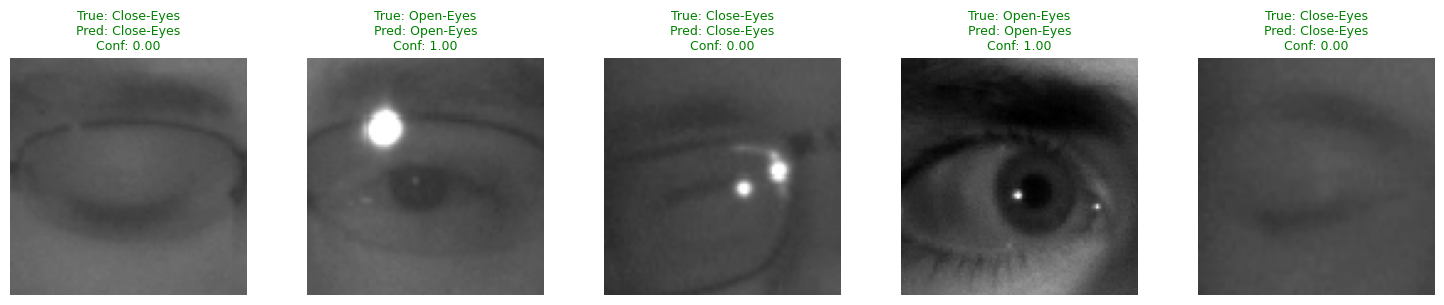


Confusion Matrix:
----------------------------------------
                 Predicted
              Close  |  Open
Actual Close:   8347  |     42
Actual Open:    2234  |   6356

Detailed Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

  Close-Eyes       0.79      0.99      0.88      8389
   Open-Eyes       0.99      0.74      0.85      8590

    accuracy                           0.87     16979
   macro avg       0.89      0.87      0.86     16979
weighted avg       0.89      0.87      0.86     16979


MODEL COMPARISON
CNN Model Accuracy:       0.9102
MobileNet Model Accuracy: 0.8658
Improvement:              -0.0443 (-4.87%)

MobileNet model testing complete!
CNN Model Accuracy:       0.9102
MobileNet Model Accuracy: 0.8658
Improvement:              -0.0443 (-4.87%)

MobileNet model testing complete!


In [ ]:

print("\n" + "="*50)
print("MOBILENET MODEL EVALUATION")
print("="*50)

# Evaluate on validation set
test_loss, test_acc = mobilenet_model.evaluate(val_generator_mobilenet, verbose=0)
print(f"\nValidation Accuracy: {test_acc:.4f}")
print(f"Validation Loss: {test_loss:.4f}")

# Get predictions on a batch
val_generator_mobilenet.reset()
sample_batch = next(val_generator_mobilenet)
sample_imgs = sample_batch[0]
sample_labels = sample_batch[1]

# Predict
pred_probs = mobilenet_model.predict(sample_imgs, verbose=0)
pred_classes = (pred_probs > 0.5).astype(int).flatten()
true_classes = sample_labels.astype(int)

# Display sample predictions
classes = ["Close-Eyes", "Open-Eyes"]
num_display = min(5, len(sample_imgs))

print(f"\nSample Predictions (showing {num_display} images):")
print("-" * 60)
for i in range(num_display):
    true_label = classes[true_classes[i]]
    pred_label = classes[pred_classes[i]]
    confidence = pred_probs[i][0] if pred_classes[i] == 1 else (1 - pred_probs[i][0])
    status = "✓" if pred_classes[i] == true_classes[i] else "✗"
    print(f"{status} Sample {i+1}: True={true_label:12s} | Pred={pred_label:12s} | Confidence={confidence:.3f}")

# Visualize predictions
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, num_display, figsize=(3*num_display, 3))
if num_display == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    # Convert from preprocessed format back to displayable RGB
    img_display = sample_imgs[i].copy()
    # Reverse MobileNetV2 preprocessing: [-1, 1] -> [0, 255]
    img_display = (img_display + 1.0) * 127.5
    img_display = np.clip(img_display, 0, 255).astype(np.uint8)
    
    ax.imshow(img_display)
    color = 'green' if pred_classes[i] == true_classes[i] else 'red'
    ax.set_title(f"True: {classes[true_classes[i]]}\nPred: {classes[pred_classes[i]]}\nConf: {pred_probs[i][0]:.2f}", 
                 color=color, fontsize=9)
    ax.axis("off")
plt.tight_layout()
plt.show()

# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions on entire validation set
val_generator_mobilenet.reset()
all_preds = []
all_true = []

for i in range(len(val_generator_mobilenet)):
    batch = next(val_generator_mobilenet)
    batch_imgs = batch[0]
    batch_labels = batch[1]
    batch_preds = mobilenet_model.predict(batch_imgs, verbose=0)
    batch_pred_classes = (batch_preds > 0.5).astype(int).flatten()
    
    all_preds.extend(batch_pred_classes)
    all_true.extend(batch_labels.astype(int))

all_preds = np.array(all_preds)
all_true = np.array(all_true)

# Confusion matrix
cm = confusion_matrix(all_true, all_preds)
print("\nConfusion Matrix:")
print("-" * 40)
print(f"                 Predicted")
print(f"              Close  |  Open")
print(f"Actual Close:  {cm[0][0]:5d}  |  {cm[0][1]:5d}")
print(f"Actual Open:   {cm[1][0]:5d}  |  {cm[1][1]:5d}")

# Classification report
print("\nDetailed Classification Report:")
print("-" * 60)
print(classification_report(all_true, all_preds, target_names=classes))

# Compare with CNN model
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
cnn_acc = cnn_model.evaluate(val_generator, verbose=0)[1]
mobilenet_acc = test_acc
print(f"CNN Model Accuracy:       {cnn_acc:.4f}")
print(f"MobileNet Model Accuracy: {mobilenet_acc:.4f}")
print(f"Improvement:              {(mobilenet_acc - cnn_acc):.4f} ({((mobilenet_acc - cnn_acc)/cnn_acc)*100:.2f}%)")

print("\nMobileNet model testing complete!")

We will save the trained models as cnn_drowsiness_model.h5 and mobilenet_drowsiness_model.h5 to use it for live camera feed in live_demo.py

In [23]:
# Save the trained models
print("Saving models...")
cnn_model.save('cnn_drowsiness_model.h5')
print("✓ CNN model saved as 'cnn_drowsiness_model.h5'")

mobilenet_model.save('mobilenet_drowsiness_model.h5')
print("✓ MobileNet model saved as 'mobilenet_drowsiness_model.h5'")

print("\nModels saved successfully! You can now use them in the terminal with:")
print("python /Users/nvssrj/Desktop/ECE_5831_Proj/live_demo.py --model_path cnn_drowsiness_model.h5")

Saving models...
✓ CNN model saved as 'cnn_drowsiness_model.h5'
✓ MobileNet model saved as 'mobilenet_drowsiness_model.h5'

Models saved successfully! You can now use them in the terminal with:
python /Users/nvssrj/Desktop/ECE_5831_Proj/live_demo.py --model_path cnn_drowsiness_model.h5
